In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_path = 'data/ex2data1.csv'
data = pd.read_csv(data_path, header=None)
data = data.reindex(np.random.permutation(data.index))
print(data.shape)
data.head()

(100, 3)


,0,1,2
84,80.366756,90.960148,1
37,64.176989,80.908061,1
50,79.944818,74.163119,1
64,44.668262,66.450086,0
33,52.045405,69.432860,1


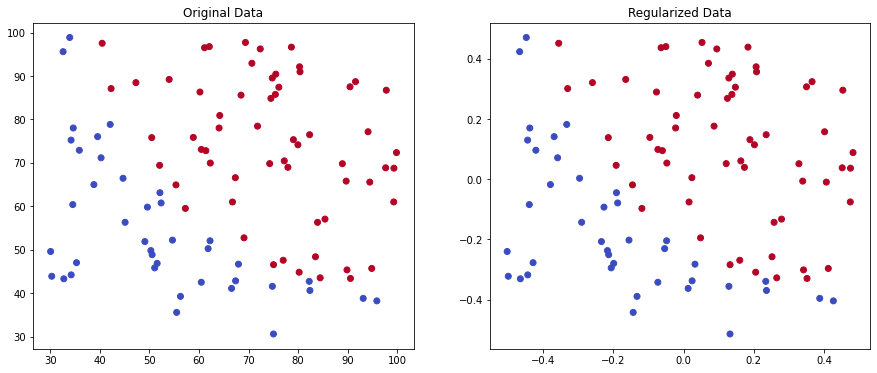

In [3]:
fig = plt.figure(figsize=(15, 6))
cmap = plt.cm.coolwarm

ax = fig.add_subplot(121)
ax.set_title('Original Data')
ax.scatter(data[0], data[1], c=data[2], cmap=cmap)

m = data.shape[0]
n = data.shape[1] - 1

for i in range(n):
    miu = np.mean(data[i])
    delta = max(data[i]) - min(data[i]) + 1
    data[i] = (data[i] - miu) / delta

ax = fig.add_subplot(122)
ax.set_title('Regularized Data')
ax.scatter(data[0], data[1], c=data[2], cmap=cmap);

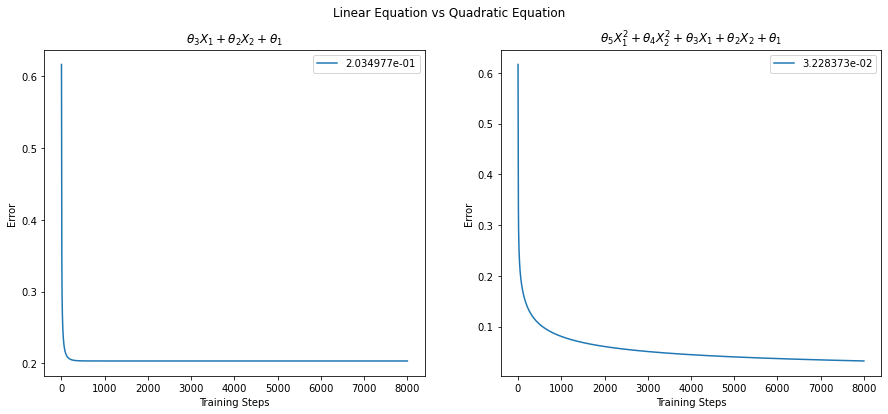

In [4]:
sigmoid = lambda z: 1 / (1 + np.exp(-z))
cost = lambda z, y: sum(-y * np.log(sigmoid(z)) - (1 - y) * np.log(1 - sigmoid(z))) / y.size

def gradient_descent(theta, x, y, steps, alpha):
    gradient = lambda theta, x, y: x.T.dot(sigmoid(x.dot(theta)) - y) / y.size
    cost_history = np.empty(0)

    for i in range(steps):
        theta = theta - alpha * gradient(theta, x, y)
        cost_history = np.append(cost_history, cost(x.dot(theta), y))
        if cost_history[-1] == 0:
            break

    return (theta, cost_history)

n = 3
m = data[0].size
x = np.array((data[0], data[1], np.ones(m))).T
y = data[2]
theta = np.zeros(n)
steps = 8000
alpha = 10

linear_theta, cost_history = gradient_descent(theta, x, y, steps, alpha)

fig = plt.figure(figsize=(15, 6))
fig.suptitle('Linear Equation vs Quadratic Equation')

ax = fig.add_subplot(121)
linear_equation = r'$\theta_3 X_1 + \theta_2 X_2 + \theta_1$'
ax.set_title(linear_equation)
ax.set_xlabel('Training Steps')
ax.set_ylabel('Error')
ax.plot(np.arange(0, cost_history.size, 1), cost_history, label=f'{cost_history[-1]:e}')
ax.legend(loc='best')

n = 5
x = np.array((data[0], data[1], np.square(data[0]), np.square(data[1]), np.ones(m))).T
theta = np.zeros(n)

quadratic_theta, cost_history = gradient_descent(theta, x, y, steps, alpha)

ax = fig.add_subplot(122)
quadratic_equation = r'$\theta_5 X_1^2 + \theta_4 X_2^2 + \theta_3 X_1 + \theta_2 X_2 + \theta_1$'
ax.set_title(quadratic_equation)
ax.set_xlabel('Training Steps')
ax.set_ylabel('Error')
ax.plot(np.arange(0, cost_history.size, 1), cost_history, label=f'{cost_history[-1]:e}')
ax.legend(loc='best');

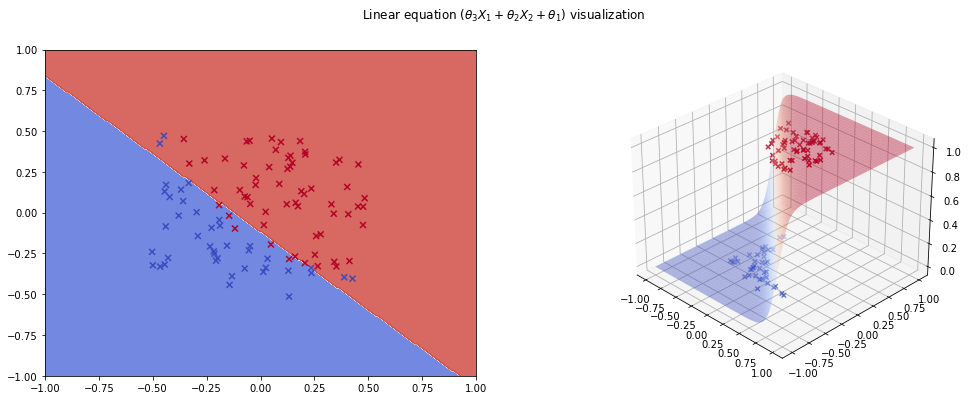

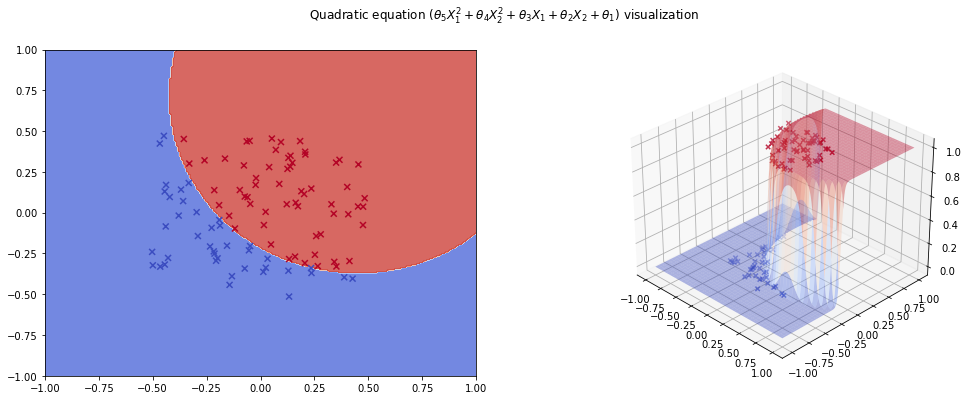

In [5]:
normalize = lambda z: sigmoid(z) > 0.5

fig = plt.figure(figsize=(17, 6))
fig.suptitle(f'Linear equation ({linear_equation}) visualization')
cmap = plt.cm.coolwarm

X = np.array(np.meshgrid(np.linspace(-1, 1, 256), np.linspace(-1, 1, 256)))
X = np.concatenate((X, np.ones((1, 256, 256))))
Z = X.T.dot(linear_theta)

ax = fig.add_subplot(121)
ax.contourf(X[0], X[1], normalize(Z), cmap=cmap, alpha=0.8)
ax.scatter(data[0], data[1], c=data[2], cmap=cmap, marker='x')

ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(X[0], X[1], sigmoid(Z), cmap=cmap, alpha=0.4)
ax.scatter3D(data[0], data[1], data[2], c=data[2], cmap=cmap, marker='x')
ax.view_init(azim=315)

fig = plt.figure(figsize=(17, 6))

X, Y = np.meshgrid(np.linspace(-1, 1, 256), np.linspace(-1, 1, 256))
Z = np.zeros(X.shape)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        x = np.array((X[i][j], Y[i][j], np.square(X[i][j]), np.square(Y[i][j]), 1))
        Z[i][j] = x.T.dot(quadratic_theta)

ax = fig.add_subplot(121)
fig.suptitle(f'Quadratic equation ({quadratic_equation}) visualization')
ax.contourf(X, Y, normalize(Z), cmap=cmap, alpha=0.8)
ax.scatter(data[0], data[1], c=data[2], cmap=cmap, marker='x')

ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(X, Y, sigmoid(Z), cmap=cmap, alpha=0.4)
ax.scatter3D(data[0], data[1], data[2], c=data[2], cmap=cmap, marker='x')
ax.view_init(azim=315)